In [1]:
import pandas as pd
from matplotlib import pyplot as plt

pd.options.display.max_columns = 999
plt.style.use('ggplot')
from pylab import rcParams
%matplotlib inline

In [2]:
df_prices = pd.read_csv("data/player_price.csv")
df_stats = pd.read_csv("data/player_stats.csv")
df_prices['Date'] = pd.to_datetime(df_prices['timestamp'], unit='ms')
df_prices.drop(["timestamp", "ps_price"], axis=1, inplace=True)

In [3]:
df_stats["boo"] = 0
df_stats.loc[df_stats["overall_score"] > 87, "boo"] = 1

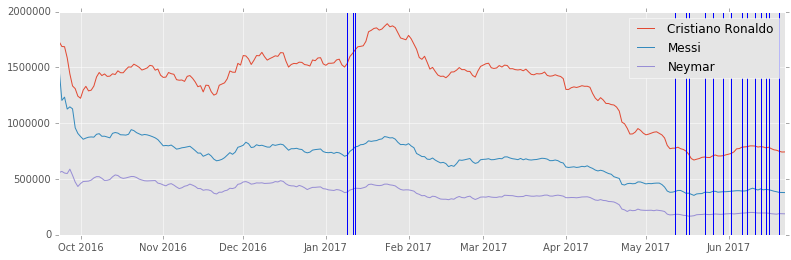

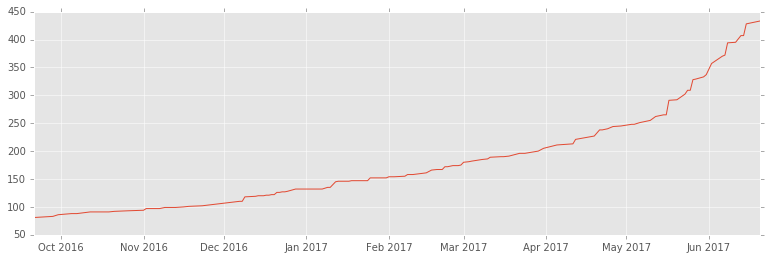

In [8]:
rcParams['figure.figsize'] = 13, 4
for i in [2,3,9]:
    plt.plot(df_prices.loc[df_prices["player_id"]==i, "Date"],df_prices.loc[df_prices["player_id"]==i, "xbox_price"], 
             label=df_prices.loc[df_prices["player_id"]==i, "player_name"].values[0])
for i in df_stats.loc[df_stats['revision'].isin(['TOTS', 'TOTY']), "added_on"]:
    plt.axvline(x=i)
plt.legend();
plt.show();
rcParams['figure.figsize'] = 13, 4
plt.plot(pd.to_datetime(df_stats.groupby(["added_on"])["boo"].sum().cumsum().index), 
         df_stats.groupby(["added_on"])["boo"].sum().cumsum())

In [7]:
df_stats.revision.unique()

array(['Legend', 'TOTS', 'TOTY', 'CMOTM', 'RB', 'TIF', 'SIF', 'IF',
       'Normal', 'FIF', 'SBC', 'TOTGS', 'Hero', 'OTW', 'MOTM', 'Movember',
       'Halloween', 'AW', 'Premium SBC', 'FUT Birthday', 'IMOTM',
       'TOTS-Reward', 'HERO', 'StPatrick', nan], dtype=object)

Нам наиболее интересны дорогие игроки, которые делают самый большой вклад в ошибку. Если посмотреть на разных игроков выше 100к, то можно заметить одинаковый тренд. 

Попробуем найти события в примерно такие же даты. Похоже на то, что при выходе новых очень хороших игроков повышается цена и на "нормальных" игроков, а после этого цена сильно падает. 

С 9 по 12 января вышли новые крутые игроки (средний рейтинг равен 96), это привело к росту цены остальных игроков и через неделю началось падание. 

Аналогичные по среднему скору вышли игроки в середине мая и до середины июня. Именно выход новых игроков сдерживал падение и вывел на плато. Поэтому ожидается большое падение в ближайшее время.

Нужно так же обратить на первые две недели мая. Там падения были все время в субботу.